# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 9**
### **Regresión lineal: Intro**

---

In [1]:
# Tratamiento de datos
# --------------------------------
import pandas as pd

# Gráficos
# --------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

# Para evitar que salgan los warnings en jupyter
# --------------------------------
import warnings
warnings.filterwarnings('ignore')

# Modelado y evaluación
# --------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Crossvalidation
# --------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

pd.options.display.max_columns = None

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).


In [2]:
df_socio = pd.read_csv('../datos/esperanza_vida_encoding.csv', index_col=0)
df_socio.head(2)

,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,life_expectancy_at_birth_total_bc,region_eli,region_lidya
country,,,,,,,,,,,,,,,,,
Argentina,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,3.0,139.59,58.40,37.37,96.2,98.3,53.33,1.596496e+11,2,4
Australia,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,2.5,176.54,101.94,57.58,100.0,100.0,24.58,2.611737e+11,3,5


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

 - Deberéis separar la X y la y.
 - Deberéis crear el train y el test.
 - Ajustar vuestro modelo.

In [3]:
# Separamos x e y
# --------------------------------

y = df_socio['life_expectancy_at_birth_total_bc']
x = df_socio.drop('life_expectancy_at_birth_total_bc', axis=1)

In [4]:
y.head()

country
Argentina    1.596496e+11
Australia    2.611737e+11
Austria      2.443653e+11
Belarus      1.320137e+11
Belgium      2.414933e+11
Name: life_expectancy_at_birth_total_bc, dtype: float64

In [5]:
x.head()

,population_in_millions,population_density,urban_population_y,gdp_per_capita,health_total_expenditure,health_care_index,health_physicians,quantity_of_physicians,quality_of_life_index,purchasing_power_index,safety_index,pop_using_improved_drinking_water_urban,pop_using_improved_drinking_water_rural,pollution_index,region_eli,region_lidya
country,,,,,,,,,,,,,,,,
Argentina,44.271,16.2,91.749,14564.5,4.8,73.30,3.8,3.0,139.59,58.40,37.37,96.2,98.3,53.33,2,4
Australia,24.451,3.2,85.904,51352.2,9.4,74.25,3.4,2.5,176.54,101.94,57.58,100.0,100.0,24.58,3,5
Austria,8.736,106.0,58.094,44117.7,11.2,80.91,5.2,3.0,190.37,95.66,80.75,100.0,100.0,21.90,3,5
Belarus,9.468,46.7,78.134,5750.8,5.7,53.76,4.1,3.0,119.23,36.43,77.74,94.1,95.2,39.64,2,3
Belgium,11.429,377.5,97.961,40277.8,10.6,78.92,3.0,2.5,160.52,91.02,55.49,99.5,99.4,48.92,3,5


In [6]:
# Realizamos la regresión lineal
# --------------------------------

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

lr = LinearRegression(n_jobs = -1)

lr.fit(x_train, y_train)

y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

df_train = pd.DataFrame({'real' : y_train, 'predicted' : y_predict_train, 'set' : ['train']* len(y_train)})
df_test = pd.DataFrame({'real' : y_test, 'predicted' : y_predict_test, 'set' : ['test']* len(y_test)})

resultado = pd.concat([df_train, df_test], axis=0)

resultado.head()

,real,predicted,set
country,,,
Brazil,1.478254e+11,1.240866e+11,train
Israel,2.622094e+11,2.304331e+11,train
Belgium,2.414933e+11,2.594554e+11,train
Serbia,1.488658e+11,1.810778e+11,train
Netherlands,2.466086e+11,2.675970e+11,train


In [7]:
resultado['residuo'] = resultado['real'] - resultado['predicted']
resultado.head()

,real,predicted,set,residuo
country,,,,
Brazil,1.478254e+11,1.240866e+11,train,2.373886e+10
Israel,2.622094e+11,2.304331e+11,train,3.177634e+10
Belgium,2.414933e+11,2.594554e+11,train,-1.796207e+10
Serbia,1.488658e+11,1.810778e+11,train,-3.221203e+10
Netherlands,2.466086e+11,2.675970e+11,train,-2.098847e+10


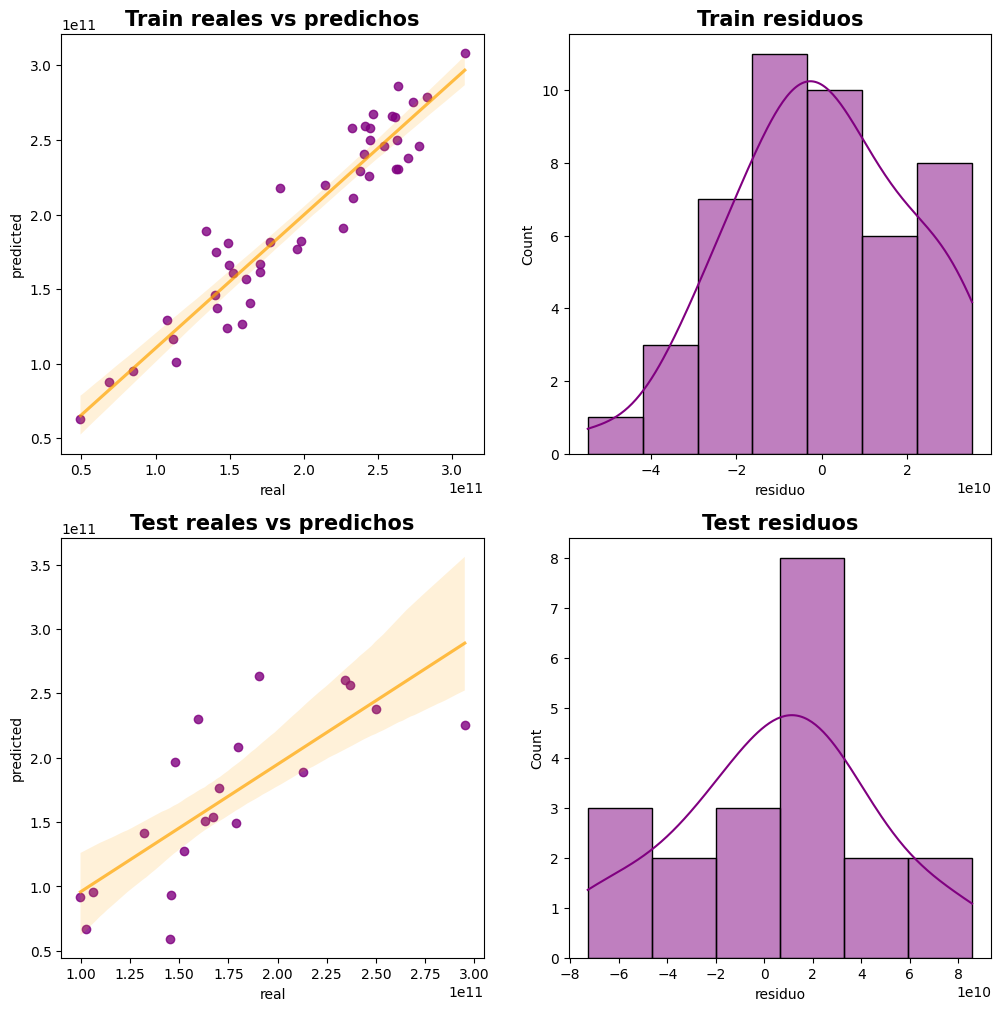

In [8]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

sns.regplot(data = resultado[resultado['set'] == "train"], 
            x = "real", 
            y = "predicted", 
            ax = ax[0,0], 
            color = "purple",
            line_kws = {"color": "orange", "alpha": 0.7 })

sns.regplot(data = resultado[resultado['set'] == "test"], 
            x = "real",
            y = "predicted", 
            color = "purple",
            line_kws = {"color": "orange", "alpha": 0.7 }, 
            ax = ax[1,0])

sns.histplot(resultado[resultado['set'] == "train"],
             x="residuo",
             color ="purple",
             kde=True, 
             ax = ax[0,1])

sns.histplot(resultado[resultado['set'] == "test"],
             x="residuo",
             color = "purple",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [9]:
# Sacamos los resultados de la validación cruzada
# --------------------------------

cross = cross_val_score(estimator = LinearRegression(), X = x, y = y, scoring = 'r2', cv = 10)
print(f"Métricas validación cruzada: {cross}") 
print(f"Media métricas de validación cruzada: {cross.mean()}")

Métricas validación cruzada: [ 0.78846474  0.86174083  0.72288458  0.73611102  0.40497597  0.89547774
  0.28143704  0.84395238  0.7210076  -0.07496567]
Media métricas de validación cruzada: 0.6181086213236776
